In [22]:
from RandomDataGenerator import Polynomial_Data_Generator
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import importlib
import RandomDataGenerator
importlib.reload(RandomDataGenerator)

<module 'RandomDataGenerator' from '/Users/jolene/Documents/NYCU/Machine Learning/HW3/RandomDataGenerator.py'>

## 1. b=1, n=4, a=1, w=[1, 2, 3, 4]

In [114]:
import math
class BayesianLinearRegression:
    def __init__(self, b, n, a, w, max_iter=500):
        self.b = b
        self.n = n
        self.a = a
        self.w = w
        self.max_iter = max_iter
        self.mu = np.zeros((n, 1))
        self.var = np.identity(n) / b
        self.point_x = []
        self.point_y = []
        self.visual_x = []
        self.visual_y = []
        
    def fit(self):
        i = 0
        while i < self.max_iter:
            x, y = Polynomial_Data_Generator(self.n, self.a, self.w)
            print(f'Add data point ({x}, {y}):\n')
            
            X = np.asarray([x ** j for j in range(self.n)]).reshape(-1, 1)
            y = np.array([[y]])
            S = np.linalg.pinv(self.var)
            
            estimate_var = np.linalg.pinv(self.a * (X @ X.T) + S)
            estimate_mu = estimate_var @ (self.a * X * y + S @ self.mu)
            print(f'Postirior mean:\n {estimate_mu}\nPosterior variance:\n {estimate_var}')

            pred_mu = (X.T@estimate_mu).item()
            pred_var = (X.T@estimate_var@X).item() + 1/self.a
            print(f'Predictive distribution ~ N({pred_mu:.5f}, {pred_var:.5f})')
            
            self.point_x.append(x)
            self.point_y.append(y.item())            
            
            if i in {9, 49, self.max_iter - 1}:
                self.visual_x.append(estimate_mu)
                self.visual_y.append(estimate_var)
                
            self.mu = estimate_mu
            self.var = estimate_var
            i += 1
            
    
    def plot_result(self, x_range):
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        stages = [
            (0, self.w, np.zeros((self.n, self.n)), 'Ground Truth'),
            (self.max_iter, self.visual_x[2], self.visual_y[2], 'Final Prediction'),
            (10, self.visual_x[0], self.visual_y[0], 'After 10 Points'),
            (50, self.visual_x[1], self.visual_y[1], 'After 50 Points')
        ]

        for idx, (num_points, mu, var, title) in enumerate(stages):
            pred_mu = np.zeros(len(x_range))
            pred_var = np.zeros(len(x_range))
            
            for i in range(len(x_range)):
                X = np.asarray([x_range[i] ** j for j in range(self.n)])
                pred_mu[i] = (X.T @ mu).item()
                pred_var[i] = (X.T @ var @ X).item() + self.a
            
            row, col = divmod(idx, 2)
            axs[row, col].scatter(self.point_x[:num_points], self.point_y[:num_points], color='blue', label='Data Points')
            axs[row, col].plot(x_range, pred_mu, color='black')
            axs[row, col].plot(x_range, pred_mu - pred_var, color='red')
            axs[row, col].plot(x_range, pred_mu + pred_var, color='red')
            axs[row, col].set_xlim(-2, 2)
            axs[row, col].set_ylim(-20, 20)
            axs[row, col].set_title(title)
            axs[row, col].legend()

        plt.tight_layout()
        plt.show()



## 1. b=1, n=4, a=1, w=[1, 2, 3, 4]

Add data point (0.5652581222206001, 3.2073236343728064):

Postirior mean:
 [[1.30685671]
 [0.73871137]
 [0.4175626 ]
 [0.23603065]]
Posterior variance:
 [[ 0.59253981 -0.23032018 -0.13019036 -0.07359116]
 [-0.23032018  0.86980964 -0.07359116 -0.041598  ]
 [-0.13019036 -0.07359116  0.958402   -0.02351361]
 [-0.07359116 -0.041598   -0.02351361  0.98670874]]
Predictive distribution ~ N(1.90047, 1.59254)
Add data point (0.6602841222451004, 4.04406346570795):

Postirior mean:
 [[1.73035277]
 [1.08910575]
 [0.68892388]
 [0.43781733]]
Posterior variance:
 [[ 0.51575624 -0.29384977 -0.17939054 -0.11017686]
 [-0.29384977  0.8172462  -0.11429867 -0.07186847]
 [-0.17939054 -0.11429867  0.92687626 -0.04695643]
 [-0.11017686 -0.07186847 -0.04695643  0.96927645]]
Predictive distribution ~ N(2.87586, 1.41574)
Add data point (-0.6712374782130406, -1.1576479561981534):

Postirior mean:
 [[1.11201623]
 [1.89948132]
 [0.38310215]
 [0.78739055]]
Posterior variance:
 [[ 3.39520977e-01 -6.28804843e-02 -2.66

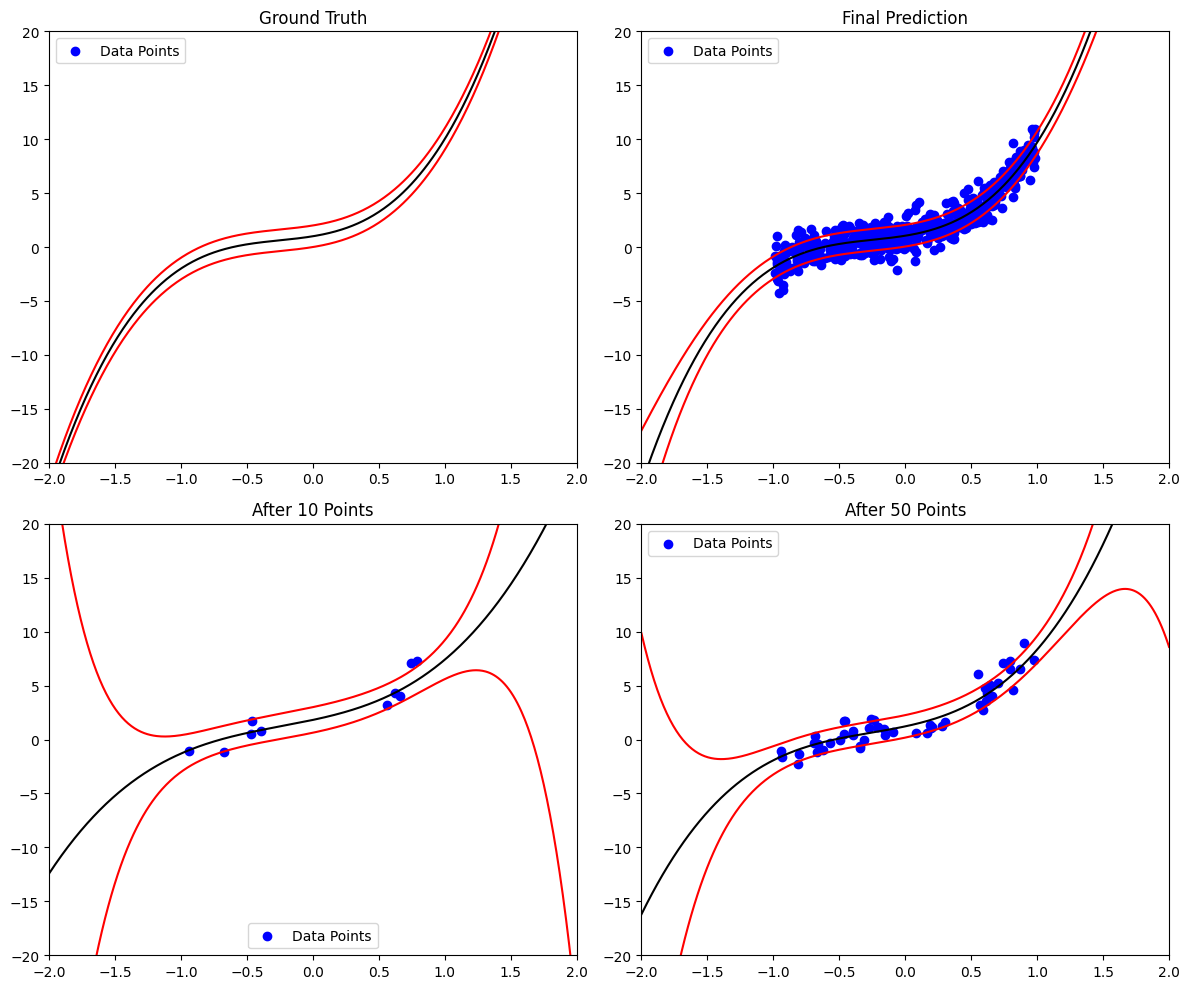

In [115]:
blr = BayesianLinearRegression(b=1, n=4, a=1, w=[1, 2, 3, 4])
blr.fit()
x_range = np.linspace(-2, 2, 500)
blr.plot_result(x_range=x_range)

## 2. b=100,n=4,a=1,w=[1,2,3,4]

Add data point (-0.12175176644741303, 0.7199201411576275):

Postirior mean:
 [[ 7.12686046e-03]
 [-8.67707851e-04]
 [ 1.05644964e-04]
 [-1.28624609e-05]]
Posterior variance:
 [[ 9.90100485e-03  1.20528348e-05 -1.46745392e-06  1.78665107e-07]
 [ 1.20528348e-05  9.99853255e-03  1.78665107e-07 -2.17527924e-08]
 [-1.46745392e-06  1.78665107e-07  9.99997825e-03  2.64844090e-09]
 [ 1.78665107e-07 -2.17527924e-08  2.64844090e-09  9.99999968e-03]]
Predictive distribution ~ N(0.00723, 1.01005)
Add data point (-0.4538730279785992, -0.4435815908242411):

Postirior mean:
 [[ 0.00271782]
 [ 0.00114894]
 [-0.00081155]
 [ 0.00040366]]
Posterior variance:
 [[ 9.80429465e-03  5.62871103e-05 -2.15856096e-05  9.31479520e-06]
 [ 5.62871103e-05  9.97830023e-03  9.38050833e-06 -4.20052734e-06]
 [-2.15856096e-05  9.38050833e-06  9.99579316e-03  1.90319357e-06]
 [ 9.31479520e-06 -4.20052734e-06  1.90319357e-06  9.99913660e-03]]
Predictive distribution ~ N(0.00199, 1.01231)
Add data point (-0.19140202668787487

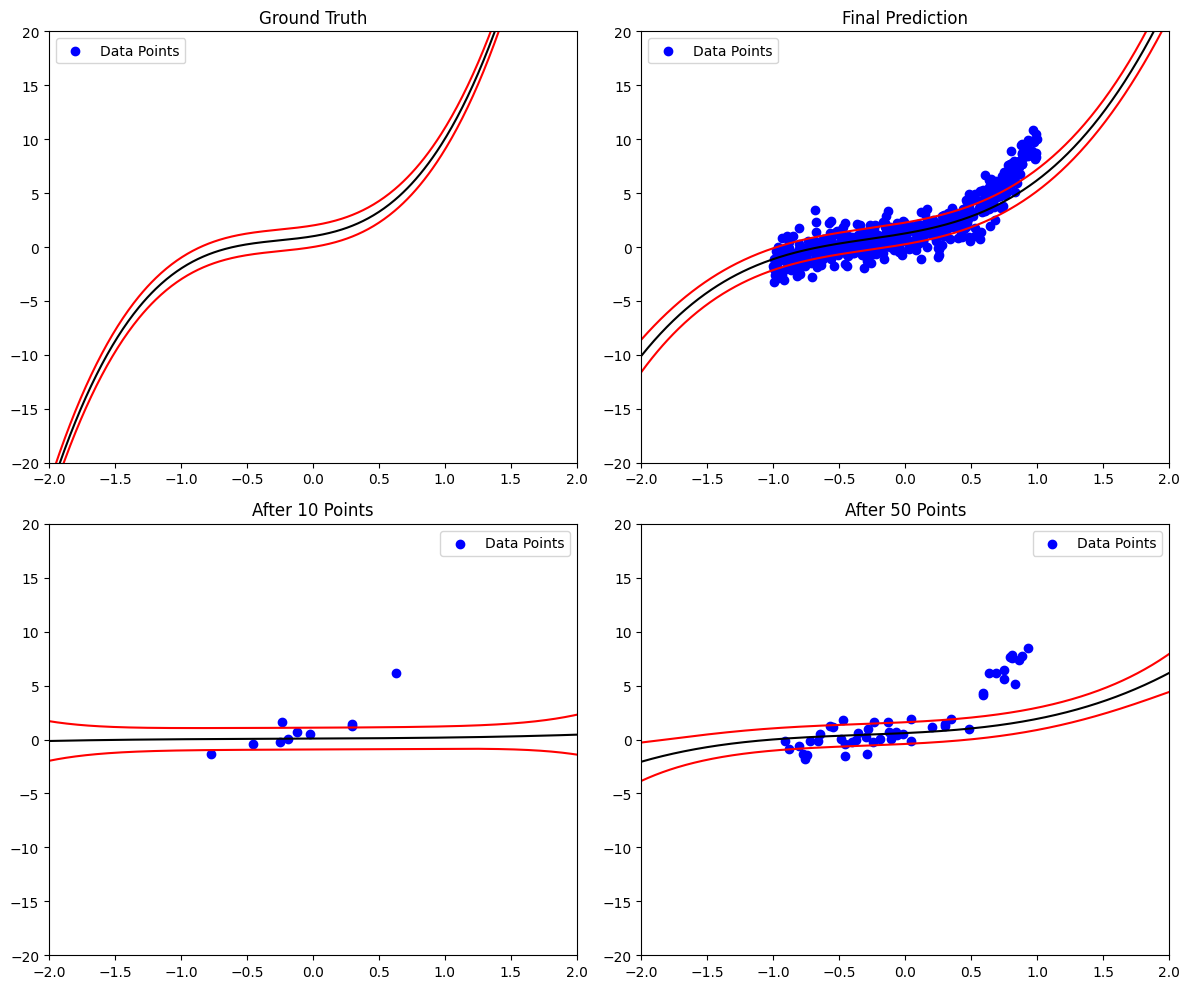

In [116]:
blr = BayesianLinearRegression(b=100,n=4,a=1,w=[1,2,3,4])
blr.fit()
x_range = np.linspace(-2, 2, 500)
blr.plot_result(x_range=x_range)

## 3. b=1,n=3,a=3,w=[1,2,3]

Add data point (-0.037255349050761444, 3.096458766435715):

Postirior mean:
 [[ 2.31992575]
 [-0.08642964]
 [ 0.00321997]]
Posterior variance:
 [[ 2.50780998e-01  2.79124155e-02 -1.03988678e-03]
 [ 2.79124155e-02  9.98960113e-01  3.87413450e-05]
 [-1.03988678e-03  3.87413450e-05  9.99998557e-01]]
Predictive distribution ~ N(2.32315, 0.58342)
Add data point (-0.17916828753999825, 2.085960766867631):

Postirior mean:
 [[ 2.21891668]
 [-0.02433613]
 [-0.0095443 ]]
Posterior variance:
 [[ 0.15131293  0.08905863 -0.01360943]
 [ 0.08905863  0.96137157  0.00776564]
 [-0.01360943  0.00776564  0.99841017]]
Predictive distribution ~ N(2.22297, 0.48366)
Add data point (0.05138596393682615, 1.2635248974570572):

Postirior mean:
 [[ 1.91927983]
 [-0.29057199]
 [ 0.01078492]]
Posterior variance:
 [[ 0.10236772  0.04556942 -0.01028868]
 [ 0.04556942  0.92273018  0.01071622]
 [-0.01028868  0.01071622  0.99818487]]
Predictive distribution ~ N(1.90438, 0.44278)
Add data point (-0.55701562110213, 2.00363

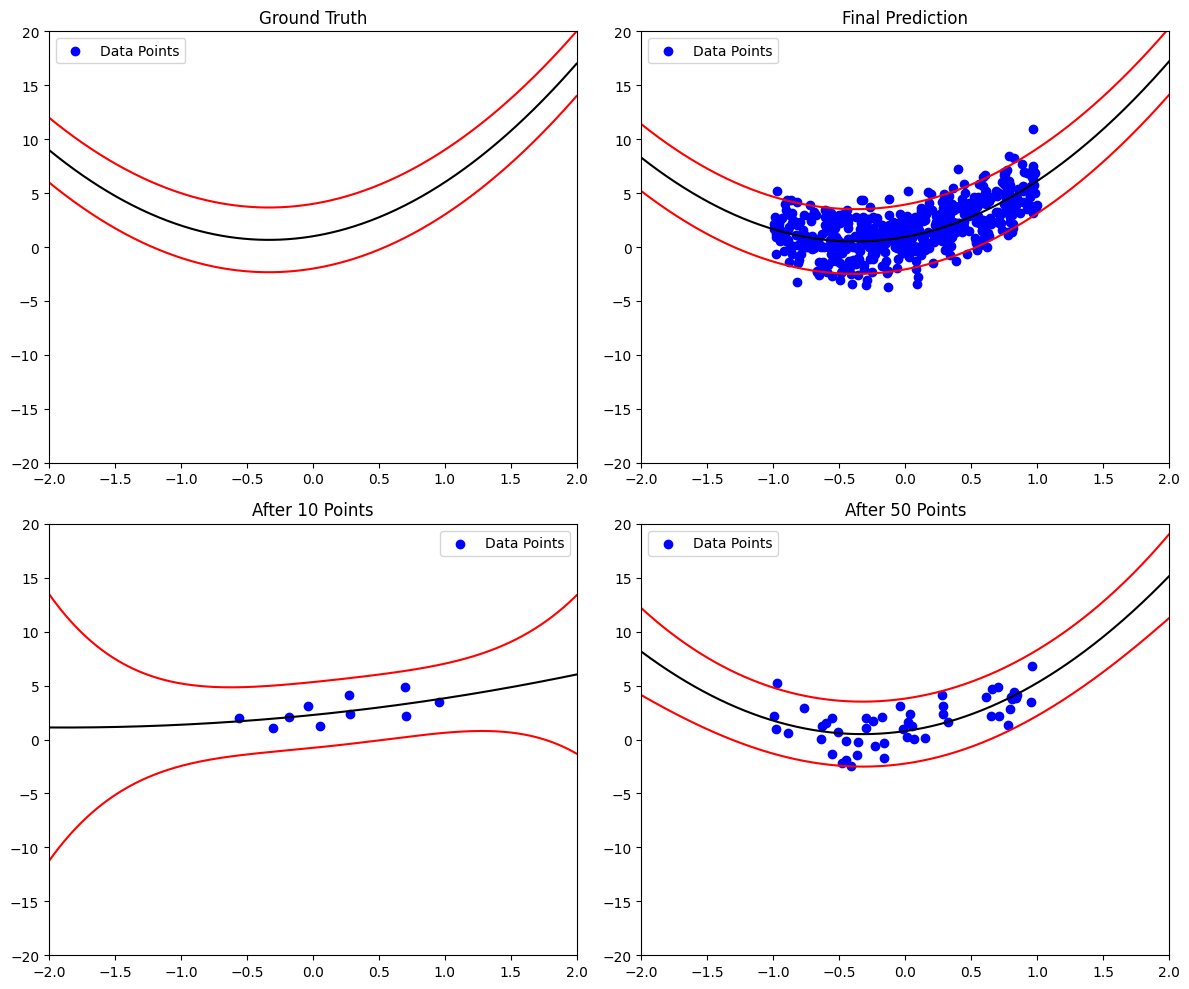

In [117]:
blr = BayesianLinearRegression(b=1,n=3,a=3,w=[1,2,3])
blr.fit()
x_range = np.linspace(-2, 2, 500)
blr.plot_result(x_range=x_range)